In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils import np_utils

In [6]:
data_train= pd.read_csv("mitbih_train.csv")

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87553 entries, 0 to 87552
Columns: 188 entries, 9.779411554336547852e-01 to 0.000000000000000000e+00.88
dtypes: float64(188)
memory usage: 125.6 MB


In [10]:
data_train.iloc[:,-1].value_counts()

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 0.000000000000000000e+00.88, dtype: int64

In [11]:
data_test= pd.read_csv("mitbih_test.csv")

In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21891 entries, 0 to 21890
Columns: 188 entries, 1.000000000000000000e+00 to 0.000000000000000000e+00.65
dtypes: float64(188)
memory usage: 31.4 MB


In [13]:
data_test.iloc[:,-1].value_counts()

0.0    18117
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 0.000000000000000000e+00.65, dtype: int64

Processing

In [14]:
x_train = data_train.iloc[:,0:187]
y_train= data_train.iloc[:,-1]
x_test= data_test.iloc[:,0:187]
y_test= data_test.iloc[:,-1]

In [15]:
y_train.value_counts()

0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 0.000000000000000000e+00.88, dtype: int64

In [16]:
y_test.value_counts()

0.0    18117
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 0.000000000000000000e+00.65, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(y_train)

y_train_enc= encoder.transform(y_train)
y_test_enc= encoder.transform(y_test)

y_train_cat= np_utils.to_categorical(y_train_enc)
y_test_cat= np_utils.to_categorical(y_test_enc)

In [18]:
y_train_cat

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [19]:
y_train_f= pd.DataFrame(y_train_cat)
y_train_f.value_counts()

0    1    2    3    4  
1.0  0.0  0.0  0.0  0.0    72470
0.0  0.0  0.0  0.0  1.0     6431
          1.0  0.0  0.0     5788
     1.0  0.0  0.0  0.0     2223
     0.0  0.0  1.0  0.0      641
dtype: int64

In [20]:
y_test_f= pd.DataFrame(y_test_cat)
y_test_f.value_counts()

0    1    2    3    4  
1.0  0.0  0.0  0.0  0.0    18117
0.0  0.0  0.0  0.0  1.0     1608
          1.0  0.0  0.0     1448
     1.0  0.0  0.0  0.0      556
     0.0  0.0  1.0  0.0      162
dtype: int64

Neural Network

In [39]:
import tensorflow as tf ##Matheus

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


'''
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[187]),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(5, activation='softmax'),
])
'''

model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy'])


early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=50, # how many epochs to wait before stopping
    restore_best_weights=True,
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          64000     
                                                                 
 lstm_2 (LSTM)               (None, 128)               98816     
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(
    x_train, y_train_f,
    validation_data=(x_test, y_test_f),
    batch_size=3000,
    epochs=250,
    callbacks=[early_stopping],
    verbose=0,  
)

history_df = pd.DataFrame(history.history)

ValueError: in user code:

    File "C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 5) and (None, 10) are incompatible


Best Validation Loss: 0.0763
Best Validation Accuracy: 0.9840


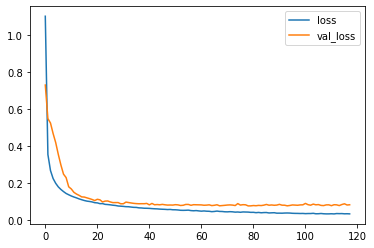

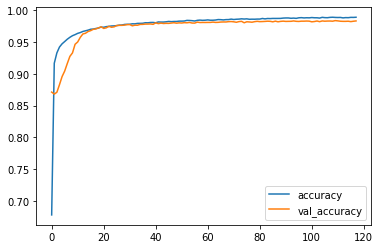

In [34]:
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

In [35]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

preds_1 = model.predict(x_test)
preds_1_rounded = np.round(preds_1)

In [36]:
y_test_fn = np.array(y_test_f)

In [37]:
print(classification_report(np.argmax(y_test_fn, axis = 1), np.argmax(preds_1_rounded, axis = 1)))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     18117
           1       0.00      0.00      0.00       556
           2       0.00      0.00      0.00      1448
           3       0.00      0.00      0.00       162
           4       0.00      0.00      0.00      1608

    accuracy                           0.83     21891
   macro avg       0.17      0.20      0.18     21891
weighted avg       0.68      0.83      0.75     21891



C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Usuário\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318